# **Анализ данных**

Имеется датасет с данными.
В нем в упорядоченном формате собраны данные о 4 компаниях: Red,
Black, Green и Blue.

По компаниям предоставлены следующие данные:
* `Hid` - human_id, зашифрованный персональный идентификатор пользователя компаний
* `has_company_id` - наличие зарегистрированного аккаунта в компании
* `company_gmv_total` - суммарный gmv пользователя в сервисе
* `company_gvm_order_count` - количество успешных заказов пользователя в сервисе
* `company_activity_count` - количество активных действий пользователя в сервисе
* `company_android` - установленное у пользователя приложение компании на платформе android
* `company_apple` - установленное у пользователя приложение компании на платформе Apple
* `company_web` - установленное у пользователя приложение компании на ПК
* `is_msk` - территориальное расположение в Москве.

Какие выводы можно сделать на основании этих данных?


Импорт необходимых библиотек.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

Загрука датасета.

In [ ]:
df = pd.read_excel('Analytic_test.xlsx', skiprows=1, index_col=0)

In [ ]:
df.head()

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(100000, 24)

In [ ]:
df.columns

Index(['HID', 'active_Red', 'has_Green_id', 'has_Black_id', 'has_Blue_id',
       'Blue_activity_count', 'Blue_gmv_total', 'Green_gvm_total',
       'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count',
       'Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web'],
      dtype='object')

Как мы видим, в одной строке содержатся NaN-ы. Вернемся к ним чуть позже.

In [ ]:
df.isna().sum()

HID                      0
active_Red               0
has_Green_id             0
has_Black_id             0
has_Blue_id              0
Blue_activity_count      0
Blue_gmv_total           1
Green_gvm_total          0
Green_gvm_order_count    0
Black_gvm_total          0
Black_gvm_order_count    0
Red_android              0
Green_android            0
Black_android            0
Blue_android             0
Red_apple                0
Green_apple              0
Black_apple              0
Blue_apple               0
is_msk                   0
Red_web                  0
Green_web                0
Black_web                0
Blue_web                 0
dtype: int64

Из таблицы ниже видно, что с типами данных не все в порядке - согласно описанию задачи они все должны быть числовые, но здесь целых 4 признака имеют тип данных `object`. В следующем пункте разберемся с этим вопросом.

In [ ]:
df.dtypes

HID                       object
active_Red               float64
has_Green_id             float64
has_Black_id             float64
has_Blue_id              float64
Blue_activity_count       object
Blue_gmv_total           float64
Green_gvm_total          float64
Green_gvm_order_count     object
Black_gvm_total          float64
Black_gvm_order_count     object
Red_android              float64
Green_android            float64
Black_android            float64
Blue_android             float64
Red_apple                float64
Green_apple              float64
Black_apple              float64
Blue_apple               float64
is_msk                   float64
Red_web                  float64
Green_web                float64
Black_web                float64
Blue_web                 float64
dtype: object

## **1. Подготовка данных**

## active_Red

In [ ]:
print(df['active_Red'].unique())
df['active_Red'] = np.int32(df['active_Red'])

[0 1]


## has_Green_id

In [ ]:
print(df['has_Green_id'].unique())
df['has_Green_id'] = np.int32(df['has_Green_id'])

[0 1 2]


## has_Black_id

In [ ]:
print(df['has_Black_id'].unique())
df['has_Black_id'] = np.int32(df['has_Black_id'])

[0 1 2]


## has_Blue_id

In [ ]:
print(df['has_Blue_id'].unique())
df['has_Blue_id'] = np.int32(df['has_Blue_id'])

[1 0 2 3 4]


## Blue_activity_count

Для того, чтобы перевести колонку 'Blue_activity_count' из object в int32 формат, необходимо выполнить следующие шаги:

Удалить все строки, которые содержат даты.
Преобразовать оставшиеся строки в целочисленный формат.
Привести тип данных колонки к int32.

In [ ]:
#dtype = object, хотя признак должен соответствовать количеству активных действий, то есть целому числу.
# Кроме того, некоторые значения имеют формат datetime.

# удаляем строки, содержащие даты (теряем 7 строк)
df = df[df['Blue_activity_count'].apply(lambda x: not isinstance(x, datetime.datetime))]

# преобразуем оставшиеся строки в числовой формат
df['Blue_activity_count'] = pd.to_numeric(df['Blue_activity_count'], errors='coerce')

# заменяем все NaN значения на 0
df['Blue_activity_count'] = df['Blue_activity_count'].fillna(0)

# приводим тип данных колонки к int32
df['Blue_activity_count'] = df['Blue_activity_count'].astype('int32')
df['Blue_activity_count'].unique()

array([  2,   0,   1,  17,  13,   5,   6,  26,   8,   4,  27,  19,  12,
         9,   3,  20,  10,  23,   7,  16,  14,  15,  53,  32,  11,  18,
        24, 119,  49,  39,  21,  35,  72,  30,  71,  28,  42,  34,  41,
        22,  29,  36,  90,  40,  43,  51,  44,  25,  31,  45,  67,  33,
       101,  74,  46, 111,  66,  38,  63, 100, 237,  59,  37,  47],
      dtype=int32)

## Blue_gmv_total

Данный признак содержит 1 NaN.

In [ ]:
df['Blue_gmv_total'].unique()

array([0.0000e+00, 2.0000e+02, 7.5200e+02, 1.3600e+02, 1.9800e+02,
       9.2400e+02, 4.4000e+01, 8.4000e+01, 4.2000e+01, 2.9000e+02,
       1.2000e+01, 4.0000e+02, 2.2000e+01, 5.0000e+01, 1.9600e+02,
       1.0600e+02, 9.0000e+01, 4.0000e+00, 7.8800e+02, 1.2080e+03,
       1.6200e+02, 3.4600e+02, 9.8000e+01, 2.7200e+02, 5.8000e+02,
       6.2000e+02, 7.4000e+01, 3.6400e+02, 4.0800e+02, 2.8800e+02,
       6.2600e+02, 1.4000e+01, 4.8000e+01, 2.0000e+00, 1.0580e+03,
       1.3400e+02, 3.1200e+02, 1.8000e+01, 3.4000e+01, 5.3600e+02,
       3.8000e+01, 2.0600e+02, 3.7800e+02, 1.1400e+02, 1.7000e+02,
       6.0000e+01, 8.2400e+02, 3.5200e+02, 1.2400e+02, 3.6000e+01,
       3.6800e+02, 1.9000e+02, 6.6000e+01, 5.0600e+02, 3.8000e+02,
       1.0680e+03, 9.6120e+03, 2.7000e+02, 9.6000e+01, 2.4000e+01,
       1.1200e+02, 6.4600e+02, 1.3800e+02, 1.0780e+03, 2.3200e+02,
       2.0260e+03, 2.3480e+03, 3.8400e+02, 2.5800e+02, 1.3000e+02,
       6.0000e+02, 1.8800e+02, 8.0000e+02, 3.5600e+02, 4.8380e

In [ ]:
# Удаляем строку с NaN
df = df.dropna()

In [ ]:
df['Blue_gmv_total'] = np.int32(df['Blue_gmv_total'])

## Green_gvm_total

In [ ]:
df['Green_gvm_total'].unique()

array([    0.,  2516., 23766.,  2448.,  1146., 37960.,  2340.,  9056.,
        4136.,   500.,  3092.,  3000.,  1974.,  4724.,  4330.,  1940.,
        1122.,  1420.,  2540., 29396.,  2040.,  1844.,  1900.,  7418.,
       27582.,  9154.,  6492.,  2132., 11806.,  9316.,  5766.,   400.,
        8078.,   840.,  2924.,  2306.,  1000.,  1136.,   540.,  1888.,
         480.,  6658.,  2548.,  2914., 65174.,   800.,   678.,  2676.,
        2258.,  2240.,  1364.,  9250., 11042.,  5406.,  2610.,  1108.,
        1106.,  1488.,   712., 34494.,  1578.,  6884.,  5750.,   478.,
       18388.,  1238.,  5434., 20566.,   362.,  7182.,   814.,  4830.,
        8338.,  2876.,  4632.,  1762.,   898., 18576.,  1832.,  5292.,
       15398.,   490.,  5550.,  3582.,   592.,  4610., 10690.,  3396.,
        2450.,  5696.,  5194.,  5518.,  3138.,  6790., 12968.,   900.,
        1512.,  5274., 27770., 12338., 23202.,  1428.,  3690.,  3042.,
       67656.,  2194.,  6970.,  7734.,  2362.,  2668.,  4398.,  5900.,
      

In [ ]:
df['Green_gvm_total'] = np.int32(df['Green_gvm_total'])

## Green_gvm_order_count

Тип - object, должен быть int. Также содержит datetime формат.

In [ ]:
df['Green_gvm_order_count'].unique()

array(['0.0', '2.0', '26.0', '5.0', '37.0', '3.0', '12.0', '7.0', '1.0',
       '6.0', '8.0', datetime.datetime(2019, 5, 4, 0, 0), '4.0', '40.0',
       '9.0', '22.0', '14.0', '15.0', '85.0', '25.0', '10.0', '20.0',
       '18.0', '11.0', '31.0', '23.0', '39.0', '13.0', '42.0', '127.0',
       '28.0', '101.0', '32.0', '30.0', '27.0', '51.0', '83.0', '36.0',
       '16.0', '64.0', '19.0', '29.0', '24.0', '52.0', '82.0', '45.0',
       '50.0', '62.0', '49.0', '21.0', '56.0', '65.0', '100.0', '76.0',
       '88.0', '17.0', '69.0', '114.0', '35.0', '125.0', '38.0', '108.0',
       '168.0', '84.0', '63.0', '75.0', '34.0', '78.0', '43.0', '60.0',
       datetime.datetime(2019, 5, 2, 0, 0)], dtype=object)

In [ ]:
#dtype = object, хотя признак должен соответствовать количеству активных действий, то есть целому числу.
# Кроме того, некоторые значения имеют формат datetime.

# удаляем строки, содержащие даты (теряем 7 строк)
df = df[df['Green_gvm_order_count'].apply(lambda x: not isinstance(x, datetime.datetime))]

# преобразуем оставшиеся строки в числовой формат
df['Green_gvm_order_count'] = pd.to_numeric(df['Green_gvm_order_count'], errors='coerce')

# заменяем все NaN значения на 0
df['Green_gvm_order_count'] = df['Green_gvm_order_count'].fillna(0)

# приводим тип данных колонки к int32
df['Green_gvm_order_count'] = df['Green_gvm_order_count'].astype('int32')

In [ ]:
df.shape

(99989, 24)

## Black_gvm_total

In [ ]:
df['Black_gvm_total'] = np.int32(df['Black_gvm_total'])

## Black_gvm_order_count

Тип - object, должен быть int. Также содержит datetime формат.

In [ ]:
df['Black_gvm_order_count'].unique()

array(['0.0', '1.0', '4.0', '2.0', '3.0', '5.0', '8.0', '25.0', '7.0',
       '27.0', '6.0', '15.0', '9.0', '10.0', '50.0', '22.0', '13.0',
       '12.0', '14.0', '16.0', '20.0', '26.0', '11.0', '18.0', '21.0',
       datetime.datetime(2019, 5, 2, 0, 0), '19.0', '37.0', '33.0',
       '17.0', '35.0', '29.0', '51.0', '23.0', '42.0', '60.0', '34.0',
       '36.0', datetime.datetime(2019, 5, 6, 0, 0)], dtype=object)

In [ ]:
#dtype = object, хотя признак должен соответствовать количеству активных действий, то есть целому числу.
# Кроме того, некоторые значения имеют формат datetime.

# удаляем строки, содержащие даты (теряем 7 строк)
df = df[df['Black_gvm_order_count'].apply(lambda x: not isinstance(x, datetime.datetime))]

# преобразуем оставшиеся строки в числовой формат
df['Black_gvm_order_count'] = pd.to_numeric(df['Black_gvm_order_count'], errors='coerce')

# заменяем все NaN значения на 0
df['Black_gvm_order_count'] = df['Black_gvm_order_count'].fillna(0)

# приводим тип данных колонки к int32
df['Black_gvm_order_count'] = df['Black_gvm_order_count'].astype('int32')

In [ ]:
df.shape

(99986, 24)

## Остальные признаки

С остальными признаками все хорошо. Разве что, пожалуй, их стоит перевести в формат `int`.

In [107]:
lst_good = ['Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web']

df[lst_good] = np.int32(df[lst_good])

## Полученные результаты

Отлично, теперь с датасетом все в порядке. Посмотрим, что получилось.

Количество NaN-ов в датасете:

In [108]:
df.isna().sum()

HID                      0
active_Red               0
has_Green_id             0
has_Black_id             0
has_Blue_id              0
Blue_activity_count      0
Blue_gmv_total           0
Green_gvm_total          0
Green_gvm_order_count    0
Black_gvm_total          0
Black_gvm_order_count    0
Red_android              0
Green_android            0
Black_android            0
Blue_android             0
Red_apple                0
Green_apple              0
Black_apple              0
Blue_apple               0
is_msk                   0
Red_web                  0
Green_web                0
Black_web                0
Blue_web                 0
dtype: int64

Типы данных в датасете:
Как видно, все интересующие нас признаки успешно переведены в целочисленный формат и подготовлены к дальнейшей работе.
Колонку "HID" не трогаем, так как это просто зашифрованный персональный идентификатор, не несущий никакой ценности для нас.

In [109]:
df.dtypes

HID                      object
active_Red                int32
has_Green_id              int32
has_Black_id              int32
has_Blue_id               int32
Blue_activity_count       int32
Blue_gmv_total            int32
Green_gvm_total           int32
Green_gvm_order_count     int32
Black_gvm_total           int32
Black_gvm_order_count     int32
Red_android               int32
Green_android             int32
Black_android             int32
Blue_android              int32
Red_apple                 int32
Green_apple               int32
Black_apple               int32
Blue_apple                int32
is_msk                    int32
Red_web                   int32
Green_web                 int32
Black_web                 int32
Blue_web                  int32
dtype: object

Итоговый размер датасета:

В процессе приведения датасета в порядок мы потеряли 14 строк, то есть примерно $0.014 \%$ от общего объема данных, что несущественно.

In [111]:
df.shape

(99986, 24)

## **2. Визуализация и анализ данных**

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
active_Red,99986.0,0.558718,0.496543,0.0,0.0,1.0,1.0,1.0
has_Green_id,99986.0,0.008831,0.093666,0.0,0.0,0.0,0.0,2.0
has_Black_id,99986.0,0.010782,0.103467,0.0,0.0,0.0,0.0,2.0
has_Blue_id,99986.0,0.137779,0.359915,0.0,0.0,0.0,0.0,4.0
Blue_activity_count,99986.0,0.210039,2.099500,0.0,0.0,0.0,0.0,237.0
Blue_gmv_total,99986.0,2.461325,126.682942,0.0,0.0,0.0,0.0,32302.0
Green_gvm_total,99986.0,59.839177,1230.627532,0.0,0.0,0.0,0.0,94106.0
Green_gvm_order_count,99986.0,0.076991,1.693890,0.0,0.0,0.0,0.0,168.0
Black_gvm_total,99986.0,94.695457,1699.044593,0.0,0.0,0.0,0.0,188252.0
Black_gvm_order_count,99986.0,0.043856,0.749914,0.0,0.0,0.0,0.0,60.0


<ipython-input-150-a6da9ac4f48d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


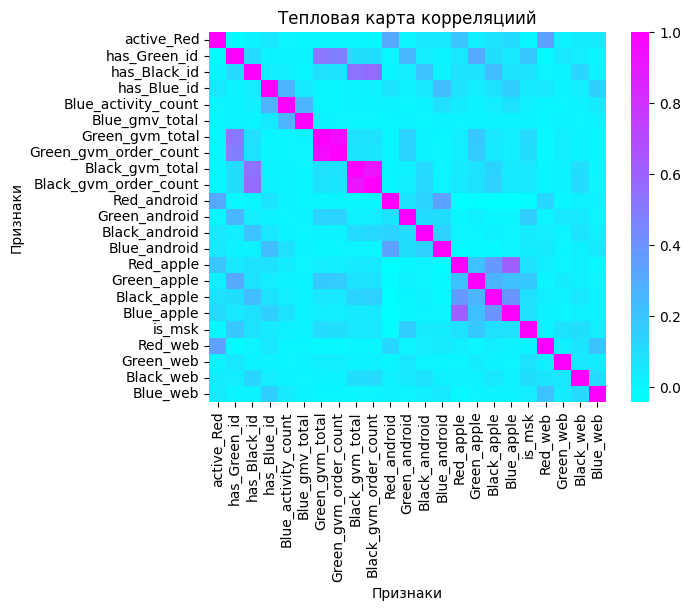

In [150]:
plt.figure(dpi=100)
corr = df.corr()
sns.heatmap(corr, cmap="cool")

plt.title("Тепловая карта корреляциий")
plt.xlabel("Признаки")
plt.ylabel("Признаки")

plt.show()

Из тепловой карты корреляций выше видно, что `Black_gvm_total` и `Black_gvm_order_count` имеют прямую корреляцию, как и `Green_gvm_total` и `Green_gvm_order_count`.

Наличие `has_Green_id` и `has_Black_id` коррелирует с соответствующими `Black_gvm_total` и `Green_gvm_total`, в отличие от `has_Blue_id`, где связь с `Blue_gvm_total` выражена гораздо менее заметно.

Кроме того, наличие установленного у пользователя приложения компании `Red` на платформе `Apple` коррелирует с наличием установленного у пользователя приложения компании `Blue` на платформе `Apple`.

При этом наличие у пользователя приложения любой из четырех компаний на базе `Android` антикоррелирует с наличием у пользователя приложения на базе `Apple` =).

Также стоит отметить, что здесь присутствует небольшая связь между признаками `active_Red` и `Red_web`.

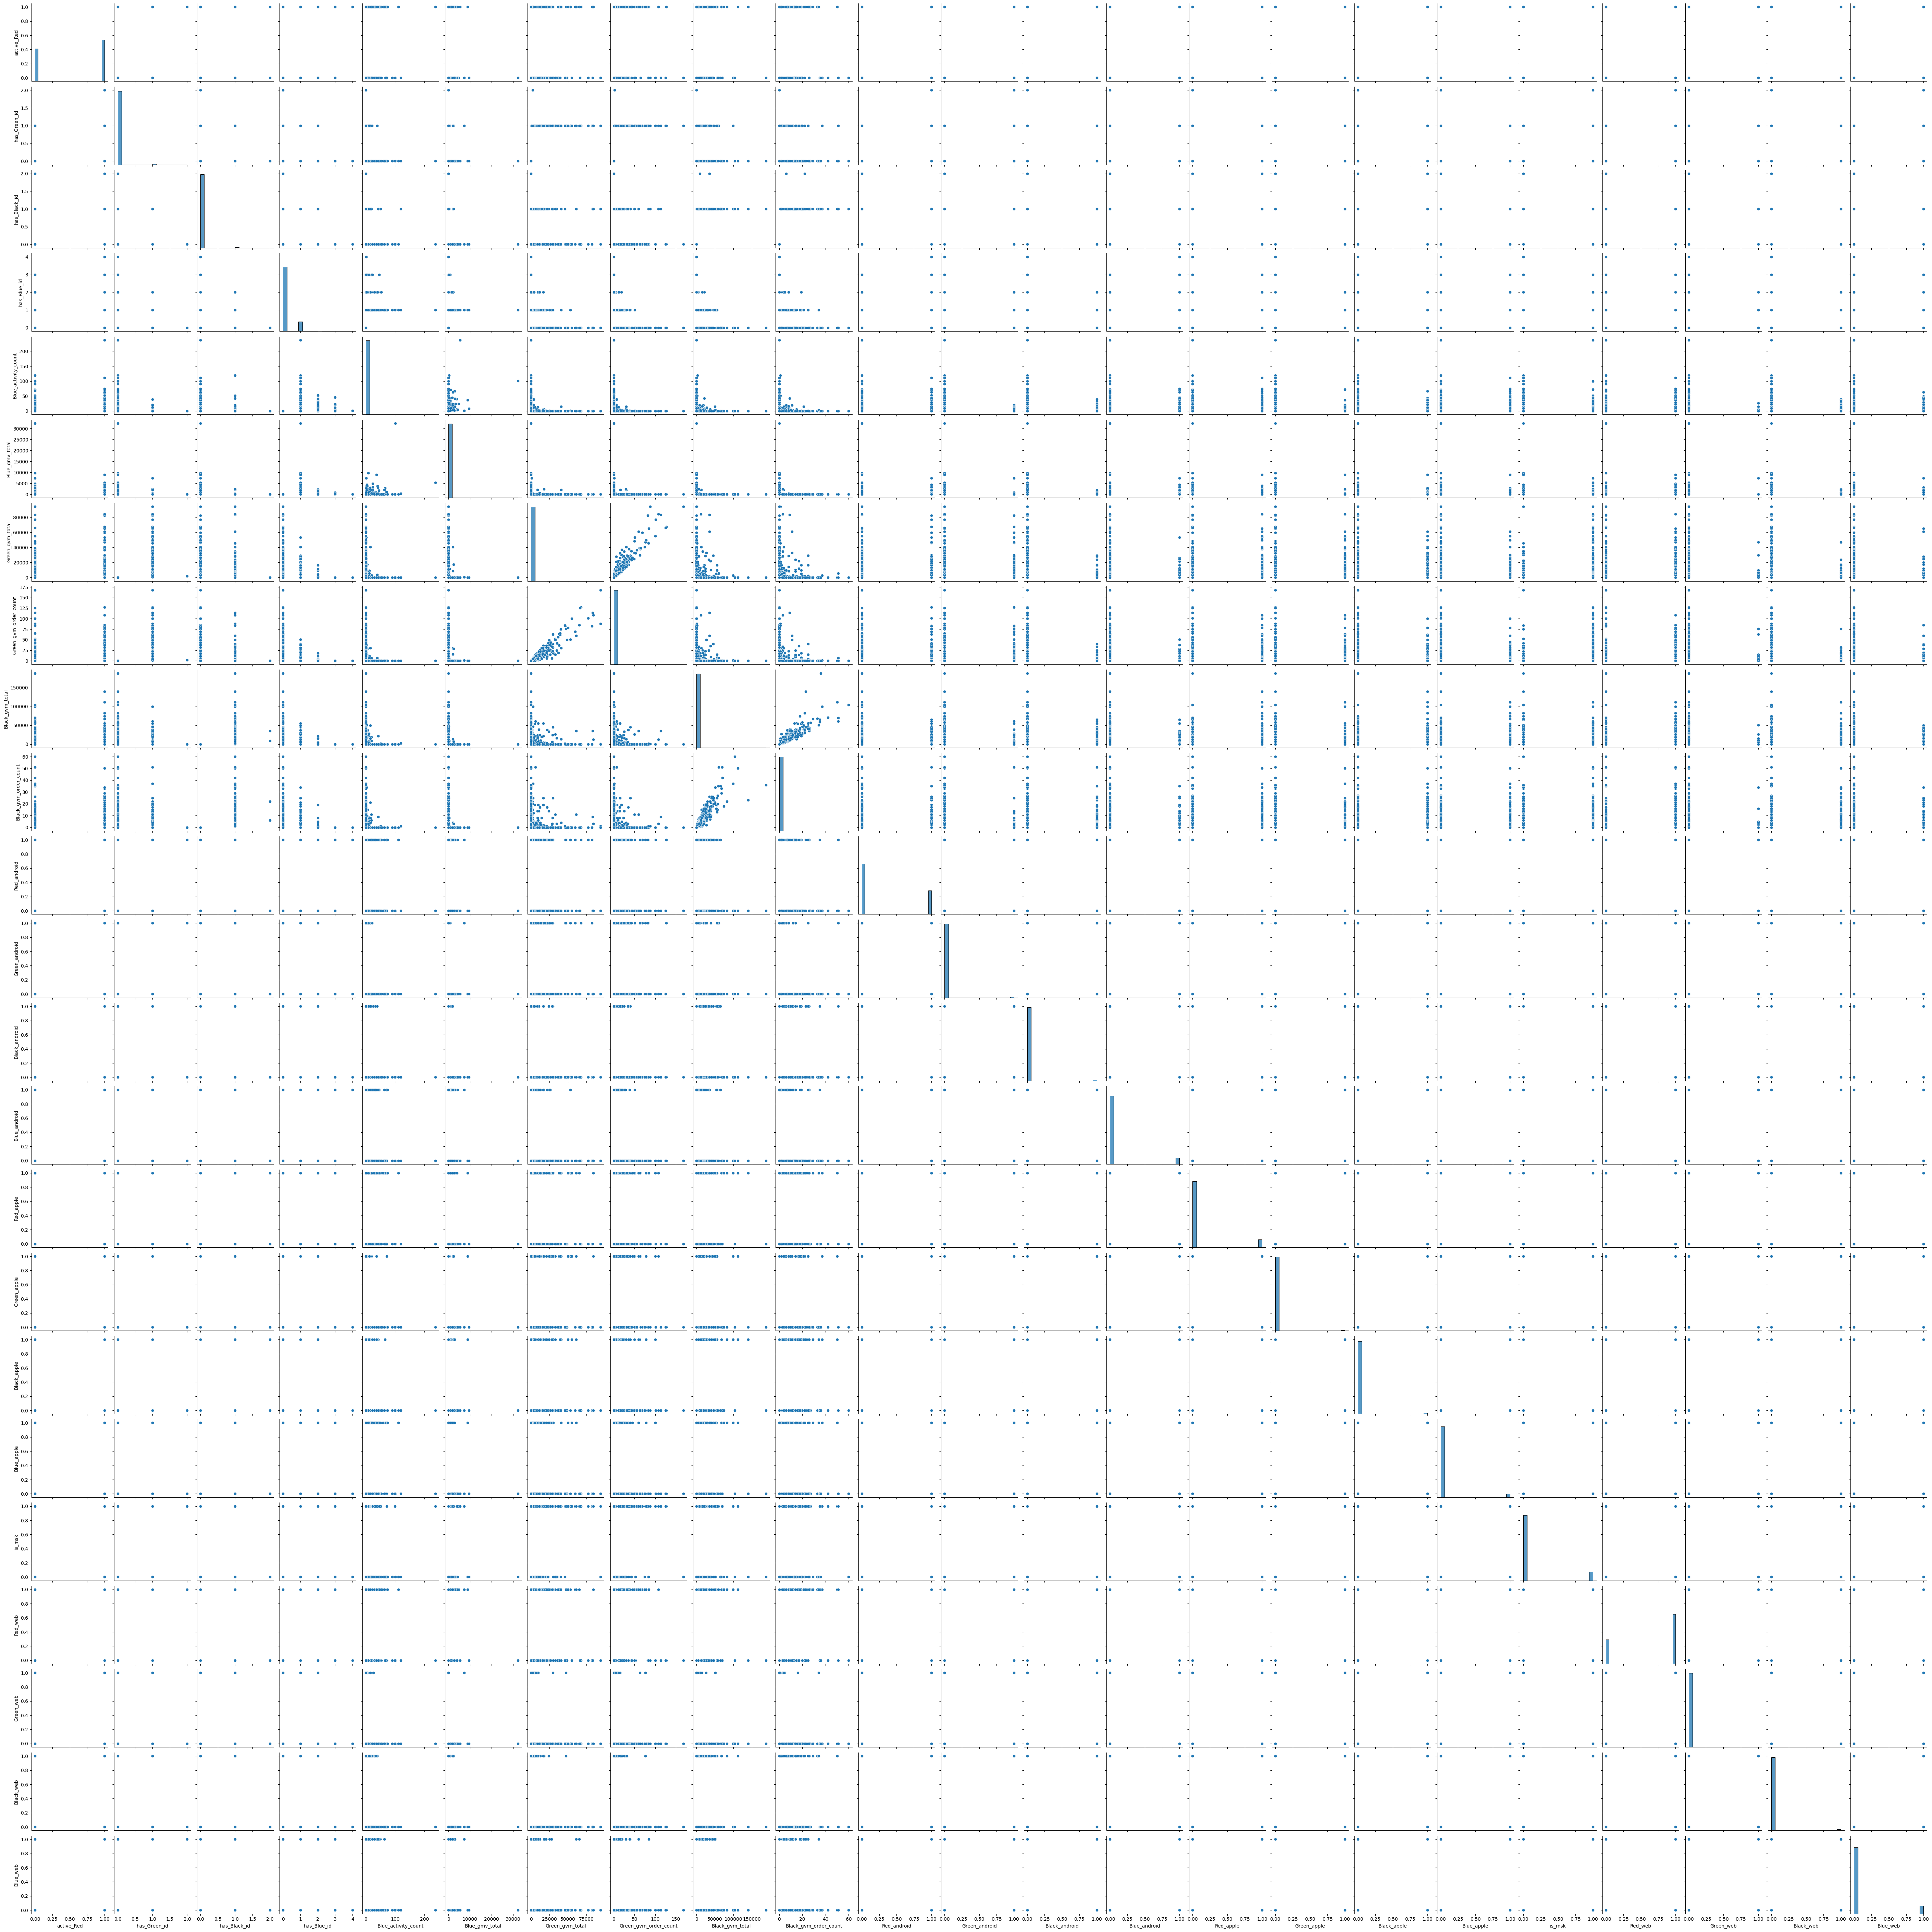

In [134]:
sns.pairplot(df[['active_Red', 'has_Green_id', 'has_Black_id', 'has_Blue_id',
       'Blue_activity_count', 'Blue_gmv_total', 'Green_gvm_total',
       'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count',
       'Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web']])
plt.show()

Отберем теперь наиболее информативную область данной диаграммы рассеяния:

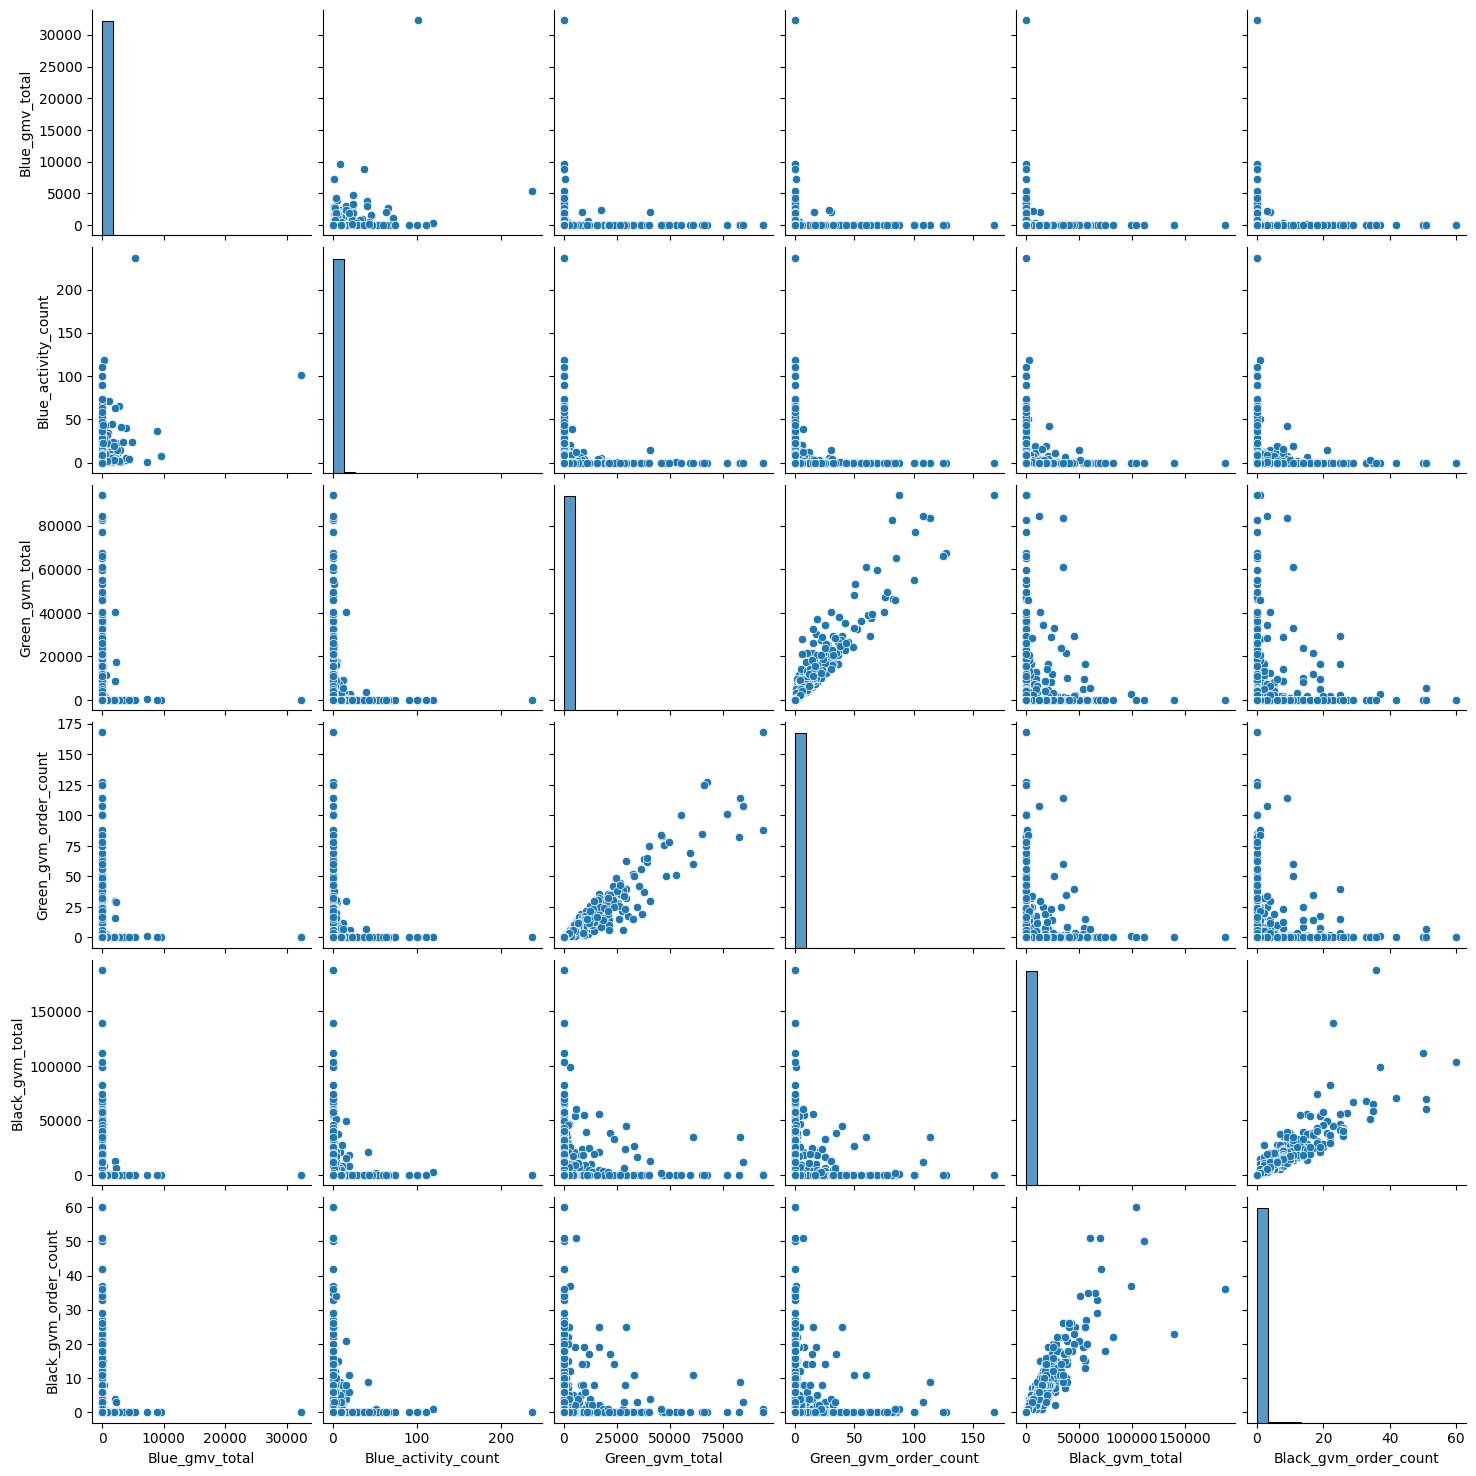

In [149]:
sns.pairplot(df[['Blue_gmv_total', 'Blue_activity_count', 'Green_gvm_total', 'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count']])
plt.show()

Из диаграммы выше видно, что между `Green_gvm_order_count` и `Green_gvm_total` есть прямая корреляция.

Из диаграммы выше видно, что между `Black_gvm_order_count` и `Black_gvm_total` есть прямая корреляция.

Наличие `Blue_activity_count` сопровождается отсутствием `Black_gvm_total`, `Green_gvm_total`.


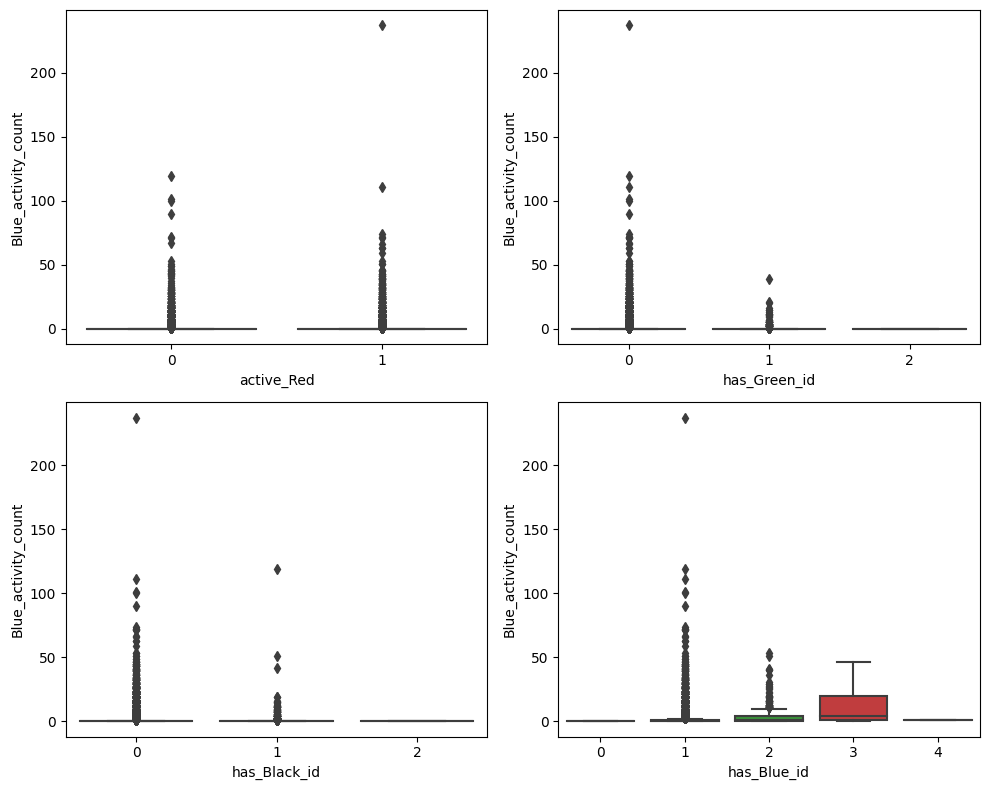

In [144]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

sns.boxplot(x='active_Red', y='Blue_activity_count', data=df, ax=axs[0][0])
sns.boxplot(x='has_Green_id', y='Blue_activity_count', data=df, ax=axs[0][1])
sns.boxplot(x='has_Black_id', y='Blue_activity_count', data=df, ax=axs[1][0])
sns.boxplot(x='has_Blue_id', y='Blue_activity_count', data=df, ax=axs[1][1])

plt.tight_layout()
plt.show()

Из коробчатых диаграмм выше видно, что:

1. Данные `active_Red` и `Blue_activity_count` находятся близко друг к другу но содержат много выбросов.

2. Данные `has_Green_id` и `Blue_activity_count` находятся близко друг к другу но имеют много выбросов.

3. Данные `has_Black_id` и `Blue_activity_count` находятся близко друг к другу, но имеют много выбросов. 

4. Данные `has_Blue_id` и `Blue_activity_count` имеют относительно значимый диапазон для значений `has_Blue_id` = [1, 2, 3] (по увеличению разброса), а `has_Blue_id` = 3 имеет наименьшие выбросы и наибольший диапазон значений.

Тем самым, можно сделать вывод, что для количества активных действий в сервисе компании `Blue` наличие зарегестрированного аккаунта в другой компании практически не сказывается на активность внутри сервиса компании `Blue`, а пользователи с аккаунтом типа 3 в компании `Blue` имеют наибольшую активность в внутри ее сервисов.

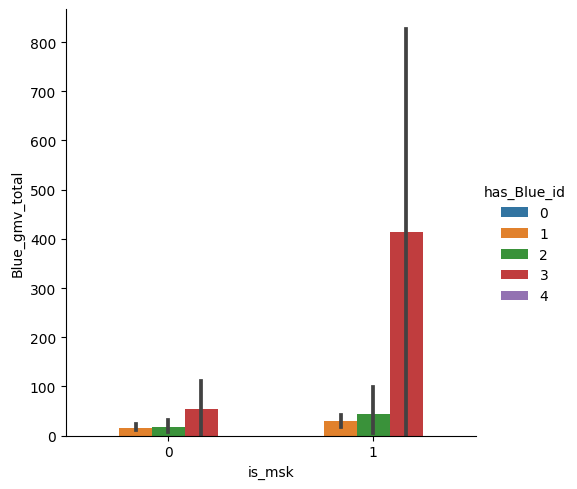

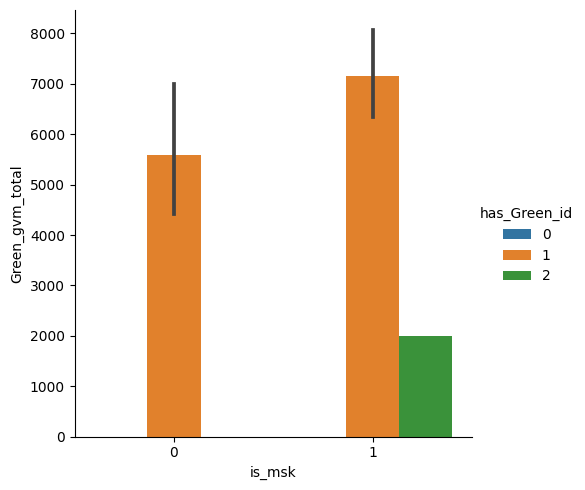

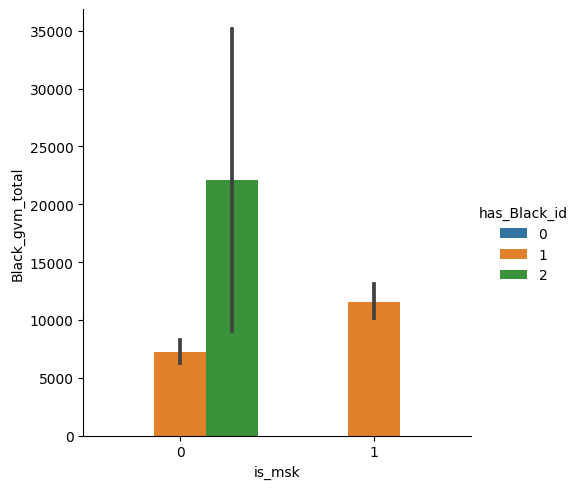

In [148]:
sns.catplot(x='is_msk', y='Blue_gmv_total', hue='has_Blue_id', kind='bar', data=df)
plt.show()

sns.catplot(x='is_msk', y='Green_gvm_total', hue='has_Green_id', kind='bar', data=df)
plt.show()

sns.catplot(x='is_msk', y='Black_gvm_total', hue='has_Black_id', kind='bar', data=df)
plt.show()

Из графиков выше видно, что пользователи, имеющие регистрацию в компании `Blue` имеют в этой компании наибольший суммарный gmv, если они зарегестрированы в Москве. Более того, пользователи с типом регистрации = 3 значительно превосходящий gmv относительно пользователей с другими типами регистрации.

Пользователи с регистрацией в компании `Green` также имеют больший суммарный gmv в компании `Green`, если они зарегестрированы в Москве. Более того, если тип их регистрации = 2, то они имеют в принципе gmv в компании `Green` исключительно в Москве.

Пользователи с регистрацией в компании `Black` же наоборот. Если тип регистрации = 2, то они имеют в принципе gmv только если зарегестрированы не в Москве. Однако, пользователи с регистрации типа 1 имеют наибольший суммарный gmv при регистрации в Москве.

## **3. Выводы**

Из тепловой карты корреляций выше видно, что `Black_gvm_total` и `Black_gvm_order_count` имеют прямую корреляцию, как и `Green_gvm_total` и `Green_gvm_order_count`.

Наличие `has_Green_id` и `has_Black_id` коррелирует с соответствующими `Black_gvm_total` и `Green_gvm_total`, в отличие от `has_Blue_id`, где связь с `Blue_gvm_total` выражена гораздо менее заметно.

Кроме того, наличие установленного у пользователя приложения компании `Red` на платформе `Apple` коррелирует с наличием установленного у пользователя приложения компании `Blue` на платформе `Apple`.

При этом наличие у пользователя приложения любой из четырех компаний на базе `Android` антикоррелирует с наличием у пользователя приложения на базе `Apple` =).

Также стоит отметить, что здесь присутствует небольшая связь между признаками `active_Red` и `Red_web`.

Опять же, из диаграммы рассеяния можно убедиться, что между `Green_gvm_order_count` и `Green_gvm_total`, а также между  `Black_gvm_order_count` и `Black_gvm_total` есть прямая корреляция. Это означает, что для данных компаний количество успешных заказов пользователя в сервисе компании напрямую связано с суммарным gvm пользователя в сервисе компании.

Наличие `Blue_activity_count` сопровождается отсутствием `Black_gvm_total`, `Green_gvm_total`, то есть рост активности в сервисах компании `Blue` сопровождается падением суммарного gvm пользователя в сервисах компаний `Green` и `Black`.

Кроме того, для количества активных действий в сервисе компании `Blue` наличие зарегестрированного аккаунта в другой компании практически не сказывается на активность внутри сервиса компании `Blue`, а пользователи с аккаунтом типа 3 в компании `Blue` имеют наибольшую активность в внутри ее сервисов.

Также было установлено, что пользователи, имеющие регистрацию в компании `Blue` имеют в этой компании наибольший суммарный gmv, если они зарегестрированы в Москве. Более того, пользователи с типом регистрации = 3 значительно превосходящий gmv относительно пользователей с другими типами регистрации.

Пользователи с регистрацией в компании `Green` также имеют больший суммарный gmv в компании `Green`, если они зарегестрированы в Москве. Более того, если тип их регистрации = 2, то они имеют в принципе gmv в компании `Green` исключительно в Москве.

Пользователи с регистрацией в компании `Black` же наоборот. Если тип регистрации = 2, то они имеют в принципе gmv только если зарегестрированы не в Москве. Однако, пользователи с регистрации типа 1 имеют наибольший суммарный gmv при регистрации в Москве.
